# **Course 3 Automatidata project**
**Go Beyond the Numbers: Translate Data into Insights**

# Exploratory Data Analysis 


**The purpose** of this project is to conduct exploratory data analysis on a provided data set with the aim of learning more about the variables. 
  
**The goal** is to clean data set and create a visualization.
<br/>  
*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Building visualizations

**Part 4:** Evaluate and share results



# **Visualize a story in Tableau and Python**

# **PACE stages** 


<img src="images/Pace.png" width="100" height="100" align=left>

   *        [Plan](#scrollTo=psz51YkZVwtN&line=3&uniqifier=1)
   *        [Analyze](#scrollTo=mA7Mz_SnI8km&line=4&uniqifier=1)
   *        [Construct](#scrollTo=Lca9c8XON8lc&line=2&uniqifier=1)
   *        [Execute](#scrollTo=401PgchTPr4E&line=2&uniqifier=1)

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: Plan 

In this stage, consider the following questions where applicable to complete your code response:
1. Identify any outliers: 


*   What methods are best for identifying outliers?
*   How do you make the decision to keep or exclude outliers from any future models?



 **Answer 1:**
 * Use numpy functions to investigate the `mean()` and `median()` of the data and understand range of data values
 * Use a boxplot to visualize the distribution of the data
 * Use histograms to visualize the distribution of the data
 
 **Answer 2:**
 * There are three main options for dealing with outliers: keeping them as they are, deleting them, or reassigning them. This depends on a decision that individual make taking into account the nature of the outlying data and the assumptions of the model  building.

  * Delete them: If you are sure the outliers are mistakes, typos, or errors and the dataset will be used for modeling or machine learning, then you are more likely to decide to delete outliers. Of the three choices, you’ll use this one the least.
  * Reassign them: If the dataset is small and/or the data will be used for modeling or machine learning, you are more likely to choose a path of deriving new values to replace the outlier values.
  * Leave them: For a dataset that you plan to do EDA/analysis on and nothing else, or for a dataset you are preparing for a model that is resistant to outliers, it is most likely that you are going to leave them in.

### Task 1. Imports, links, and loading

In [1]:
# Importing packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset into dataframe
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: Analyze 

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### Task 2a. Data exploration and cleaning

What do you do about missing data (if any)? 

Are there data outliers? What are they and how might you handle them? 


==> There is not any null value in dataset.

==> There is outlier present in trip_distance and fare_amount column.

In [3]:
df.head(5)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [4]:
df.isnull().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

Use describe... 

In [5]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


And info. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

### Task 2b. Select visualization type(s)

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the TLC dataset. What type of data visualization(s) would be most helpful? 

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map


==> A box plot will be helpful to determine outliers and where the bulk of the data points reside in terms of trip_distance, duration, and total_amount.

   A scatter plot will be helpful to visualize the trends and patters and outliers of critical variables, such as trip_distance and total_amount.

   A bar chart will help determine average number of trips per month, weekday, weekend, etc.

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: Construct 


### Task 3. Data visualization

### Boxplots

In [7]:
# Converting data columns to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

**trip distance**

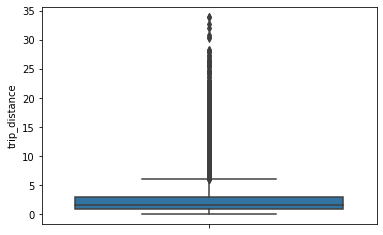

In [8]:
# Creating box plot of trip_distance
sns.boxplot(y = df['trip_distance'])

Text(0.5, 1.0, 'Trip Distance')

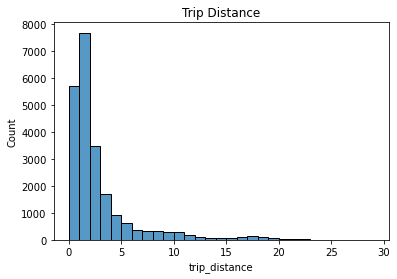

In [9]:
# Create histogram of trip_distance
sns.histplot(df['trip_distance'],bins=range(0,30,1))
plt.title("Trip Distance")

**total amount**

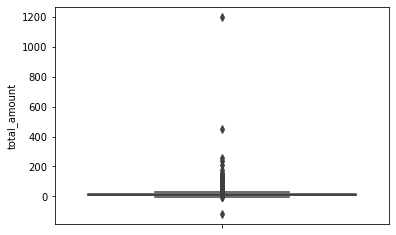

In [10]:
# Create box plot of total_amount
sns.boxplot(y = df['total_amount'])

Text(0.5, 1.0, 'Total Amount')

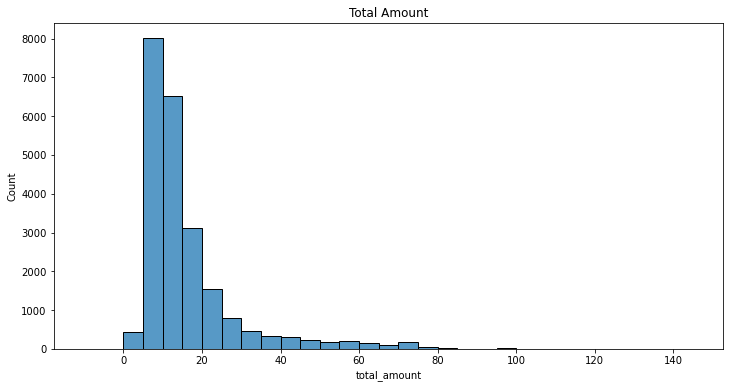

In [11]:
# Create histogram of total_amount
plt.figure(figsize=(12,6))
sns.histplot(df['total_amount'],bins = range(-10,150,5))
plt.title("Total Amount")

**tip amount**

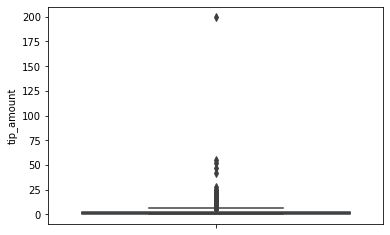

In [12]:
# Create box plot of tip_amount
sns.boxplot(y = df['tip_amount'])

Text(0.5, 1.0, 'Tip amount histogram')

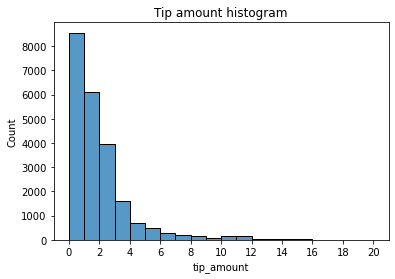

In [13]:
# Create histogram of tip_amount
ax = sns.histplot(df['tip_amount'], bins = range(0,21,1))
ax.set_xticks(range(0,21,2))
ax.set_xticklabels(range(0,21,2))
plt.title('Tip amount histogram')

**tip_amount by vendor**

Text(0.5, 1.0, 'Tip amount by Vendor')

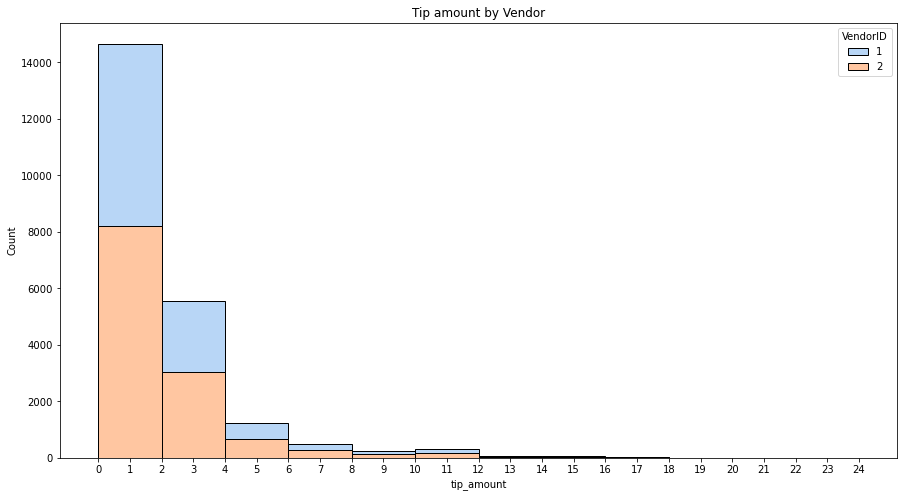

In [14]:
# Create histogram of tip_amount by vendor
plt.figure(figsize=(15,8))
ax = sns.histplot(x = df['tip_amount'],bins = range(0,25,2),hue = df['VendorID'],multiple='stack',palette='pastel')
ax.set_xticks(range(0,25,1))
ax.set_xticklabels(range(0,25,1))
plt.title('Tip amount by Vendor')

Next, zoom in on the upper end of the range of tips to check whether vendor one gets noticeably more of the most generous tips.

Text(0.5, 1.0, 'Tip amount by Vendor above $10')

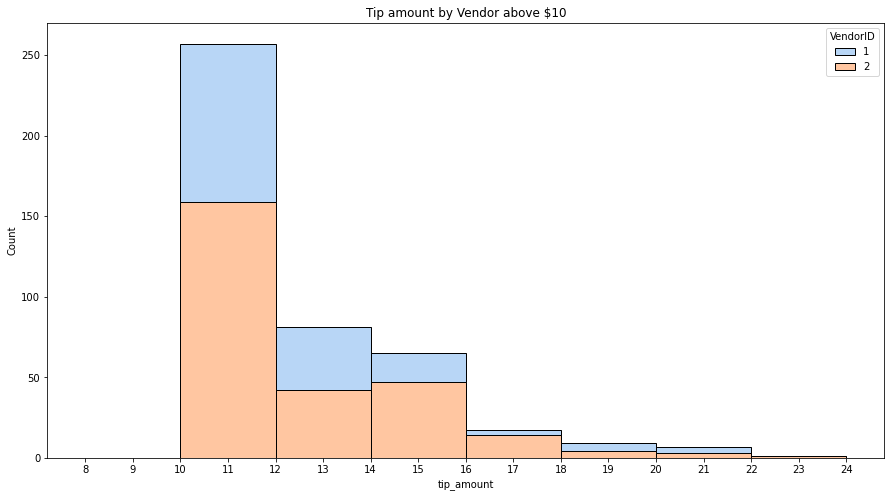

In [15]:
# Create histogram of tip_amount by vendor for tips > $10 
tips_above_10 = df[df['tip_amount']>10]
plt.figure(figsize=(15,8))
ax = sns.histplot(x = tips_above_10['tip_amount'],bins = range(8,25,2),hue = tips_above_10['VendorID'],multiple='stack',palette='pastel')
ax.set_xticks(range(8,25,1))
ax.set_xticklabels(range(8,25,1))
plt.title('Tip amount by Vendor above $10')


**Mean tips by passenger count**


In [16]:
# Examine the unique values in the passenger_count column
df['passenger_count'].value_counts()

1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: passenger_count, dtype: int64

In [17]:
# Calculate mean tips by passenger_count
mean_tip = df['tip_amount'].groupby(df['passenger_count']).mean().reset_index()
mean_tip

,passenger_count,tip_amount
0,0,2.135758
1,1,1.848920
2,2,1.856378
3,3,1.716768
4,4,1.530264
5,5,1.873185
6,6,1.720260


Text(0.5, 1.0, 'Mean tip amount by passenger count')

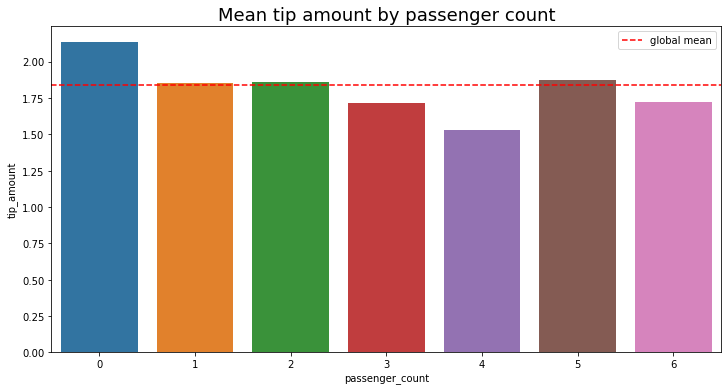

In [18]:
# Create bar plot for mean tips by passenger count
plt.figure(figsize=(12,6))
ax = sns.barplot(x = mean_tip['passenger_count'],y = mean_tip['tip_amount'])
ax.axhline(df['tip_amount'].mean(), ls='--', color='red', label='global mean')
ax.legend()
plt.title('Mean tip amount by passenger count', fontsize=18)

**Create month and day columns**

In [19]:
# Create a month column
df['month'] = df['tpep_pickup_datetime'].dt.month_name()

# Create a day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

**Plot total ride count by month**

Begin by calculating total ride count by month.

In [20]:
# Get total number of rides for each month
monthly_rides = df['month'].value_counts()
monthly_rides

March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: month, dtype: int64

Reorder the results to put the months in calendar order.

In [21]:
# Reorder the monthly ride list so months go in order
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides

January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: month, dtype: int64

Text(0.5, 1.0, 'Total rides per month')

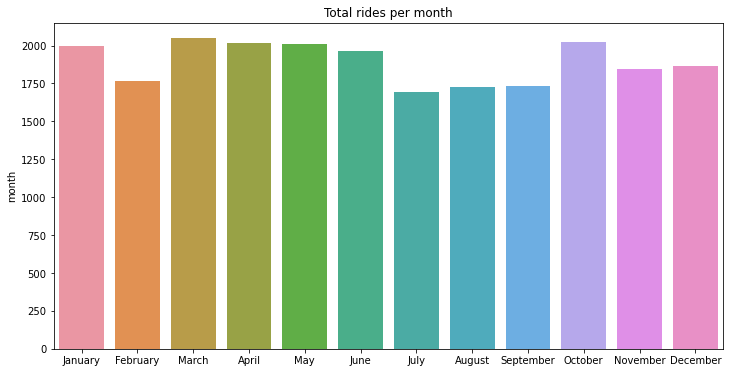

In [22]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x = monthly_rides.index,y=monthly_rides)
ax.set_xticklabels(month_order)
plt.title("Total rides per month")

**Plot total ride count by day**


In [23]:
# Repeat the above process, this time for rides by day
rides_day = df['day'].value_counts()
rides_day

Friday       3413
Thursday     3402
Wednesday    3390
Saturday     3367
Tuesday      3198
Sunday       2998
Monday       2931
Name: day, dtype: int64

In [24]:
day_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
rides_day = rides_day.reindex(index = day_order)
rides_day

Sunday       2998
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Name: day, dtype: int64

Text(0.5, 1.0, 'Rides per day')

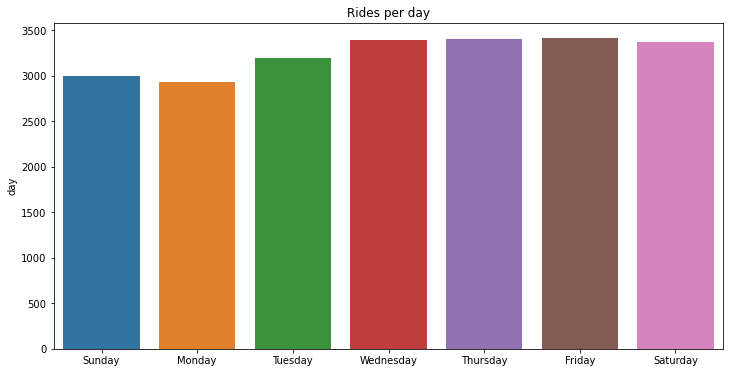

In [25]:
# Create bar plot for ride count by day
plt.figure(figsize=(12,6))
ax = sns.barplot(x = rides_day.index,y=rides_day)
ax.set_xticklabels(day_order)
plt.title("Rides per day")

**Plot total revenue by day of the week**

Repeat the above process, but now calculate the total revenue by day of the week.

In [26]:
# Repeat the process, this time for total revenue by day
revenue = df.groupby(['day'])[['total_amount']].sum()
revenue = revenue.reindex(index=day_order)
revenue

,total_amount
day,
Sunday,48624.06
Monday,49574.37
Tuesday,52527.14
Wednesday,55310.47
Thursday,57181.91
Friday,55818.74
Saturday,51195.40


Text(0.5, 1.0, 'Total revenue generated by day')

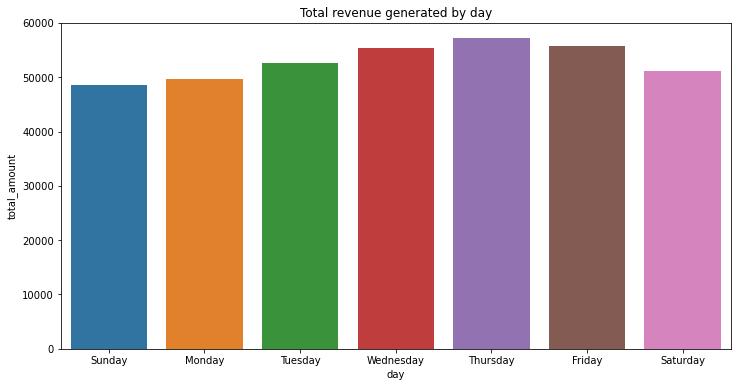

In [27]:
# Create bar plot of total revenue by day
plt.figure(figsize = (12,6))
ax = sns.barplot(x = revenue.index, y= revenue['total_amount'])
ax.set_xticklabels(day_order)
plt.title('Total revenue generated by day')

Revnue is highest on Thursday and Friday and least on Sunday and Saturday.

**Plot total revenue by month**

In [28]:
# Repeat the process, this time for total revenue by month
monthly_revenue = df.groupby(['month'])[['total_amount']].sum()
monthly_revenue = monthly_revenue.reindex(index=month_order)
monthly_revenue

,total_amount
month,
January,31735.25
February,28937.89
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
August,27759.56
September,28206.38


Text(0.5, 1.0, 'Total revenue generated per month')

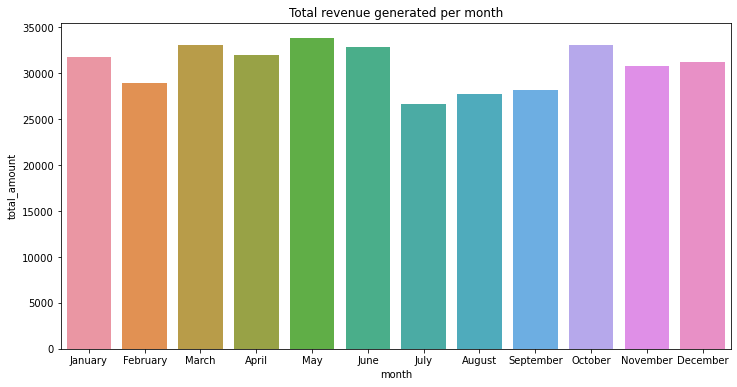

In [29]:
# Create a bar plot of total revenue by month
plt.figure(figsize = (12,6))
ax = sns.barplot(x = monthly_revenue.index, y= monthly_revenue['total_amount'])
ax.set_xticklabels(month_order)
plt.title('Total revenue generated per month')

**Plot mean trip distance by drop-off location**

In [30]:
# Get number of unique drop-off location IDs
df['DOLocationID'].nunique()

216

In [31]:
# Calculate the mean trip distance for each drop-off location
drop_off_dist = df.groupby(['DOLocationID'])[['trip_distance']].mean()

# Sort the results in descending order by mean trip distance
drop_off_dist.sort_values(by=['trip_distance'],ascending=False)

,trip_distance
DOLocationID,
23,24.275000
29,21.650000
210,20.500000
11,17.945000
51,17.310000
...,...
137,1.818852
234,1.727806
237,1.555494


Text(0.5, 1.0, 'Mean trip distance by drop-off location')

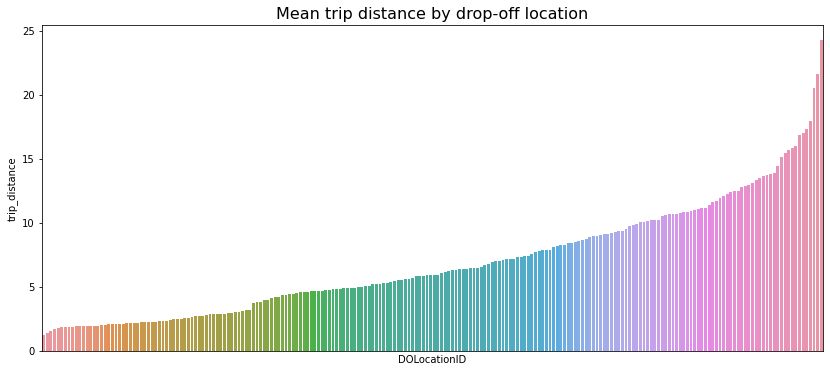

In [32]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance
plt.figure(figsize=(14,6))
ax = sns.barplot(x=drop_off_dist.index, 
                 y=drop_off_dist['trip_distance'],
                 order=drop_off_dist.sort_values(by=['trip_distance']).index)
ax.set_xticklabels([])
ax.set_xticks([])
plt.title('Mean trip distance by drop-off location', fontsize=16)

## To confirm your conclusion, consider the following experiment:


1. Create a sample of coordinates from a normal distribution&mdash;in this case 1,500 pairs of points from a normal distribution with a mean of 10 and a standard deviation of 5
2. Calculate the distance between each pair of coordinates 
3. Group the coordinates by endpoint and calculate the mean distance between that endpoint and all other points it was paired with
4. Plot the mean distance for each unique endpoint

Text(0.5, 1.0, 'Mean distance between points taken randomly from normal distribution')

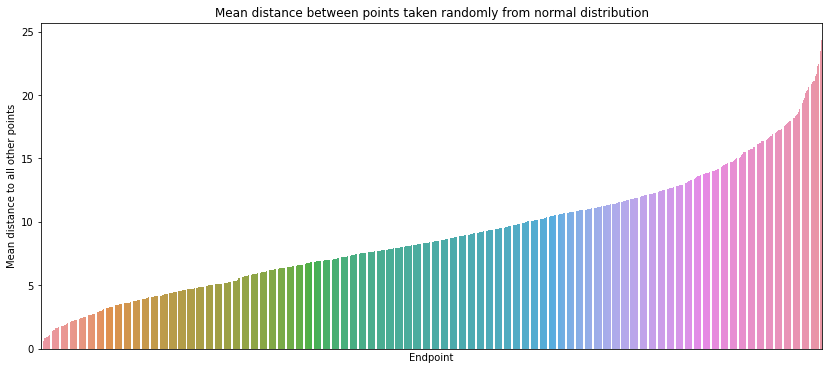

In [33]:
#1. Generate random points on a 2D plane from a normal distribution
test = np.round(np.random.normal(10, 5, (3000, 2)), 1)
midway = int(len(test)/2)  # Calculate midpoint of the array of coordinates
start = test[:midway]      # Isolate first half of array ("pick-up locations")
end = test[midway:]        # Isolate second half of array ("drop-off locations")


# 2. Calculate Euclidean distances between points in first half and second half of array
distances = (start - end)**2           
distances = distances.sum(axis=-1)
distances = np.sqrt(distances)

# 3. Group the coordinates by "drop-off location", compute mean distance
test_df = pd.DataFrame({'start': [tuple(x) for x in start.tolist()],
                   'end': [tuple(x) for x in end.tolist()],
                   'distance': distances})
data = test_df[['end', 'distance']].groupby('end').mean()
data = data.sort_values(by='distance')

# 4. Plot the mean distance between each endpoint ("drop-off location") and all points it connected to
plt.figure(figsize=(14,6))
ax = sns.barplot(x=data.index,
                 y=data['distance'],
                 order=data.index)
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_xlabel('Endpoint')
ax.set_ylabel('Mean distance to all other points')
ax.set_title('Mean distance between points taken randomly from normal distribution')

**Histogram of rides by drop-off location**

First, check to whether the drop-off locations IDs are consecutively numbered. For instance, does it go 1, 2, 3, 4..., or are some numbers missing (e.g., 1, 3, 4...). If numbers aren't all consecutive, the histogram will look like some locations have very few or no rides when in reality there's no bar because there's no location. 

In [34]:
# Check if all drop-off locations are consecutively numbered
df['DOLocationID'].max() - len(set(df['DOLocationID'])) 

49

To eliminate the spaces in the historgram that these missing numbers would create, sort the unique drop-off location values, then convert them to strings. This will make the histplot function display all bars directly next to each other. 

Text(0.5, 1.0, 'Histogram of rides by drop-off location')

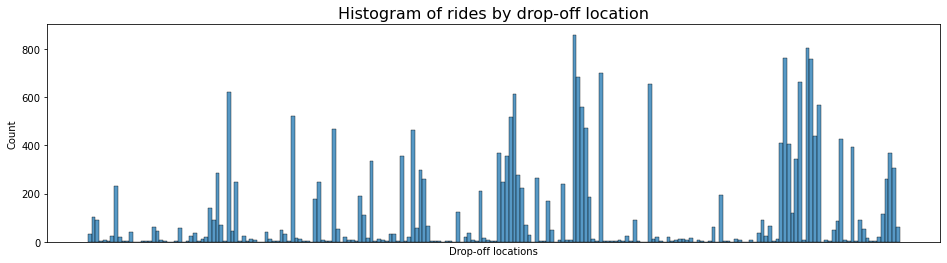

In [35]:
plt.figure(figsize=(16,4))
# DOLocationID column is numeric, so sort in ascending order
sorted_dropoffs = df['DOLocationID'].sort_values()
# Convert to string
sorted_dropoffs = sorted_dropoffs.astype('str')
# Plot
sns.histplot(sorted_dropoffs, bins=range(0, df['DOLocationID'].max()+1, 1))
plt.xticks([])
plt.xlabel('Drop-off locations')
plt.title('Histogram of rides by drop-off location', fontsize=16)

<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: Execute 

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 4a. Results and evaluation


==> ENTER YOUR RESPONSE HERE

I have learned that the highest distribution of trip distances are below 5 miles, but there are outliers all the way out to 35 miles. There are no missing values..

My other questions are what are the trip_duration and does it effect the tip amount or any other amount.

My client would likely want to know how they can generate high revenue.


In [36]:
df['trip_duration'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])

In [37]:
df.head(5)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday,0 days 00:14:04
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday,0 days 00:26:30
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday,0 days 00:07:12
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday,0 days 00:30:15
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday,0 days 00:16:43


### Task 4b. Conclusion

Why is it important to conduct Exploratory Data Analysis? Why are the data visualizations provided in this notebook useful?



EDA is important because ... 
==> It helps in finding any outliers in dataset and to find the pattern  and missing values in dataset


Visualizations helped me understand ..
==> That this dataset have some outliers and should be dealt before going any further.


You’ve now completed professional data visualizations according to a business need. Well done! 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.